In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [8]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
df['last_review'] = pd.to_datetime(df['last_review'])

In [10]:
df['month'] = df['last_review'].apply(lambda time: time.month)
df['day'] = df['last_review'].apply(lambda time: time.dayofweek)
df['year'] = df['last_review'].apply(lambda time: time.year)

Text(0.5, 1.0, 'Neighnourhood Groups')

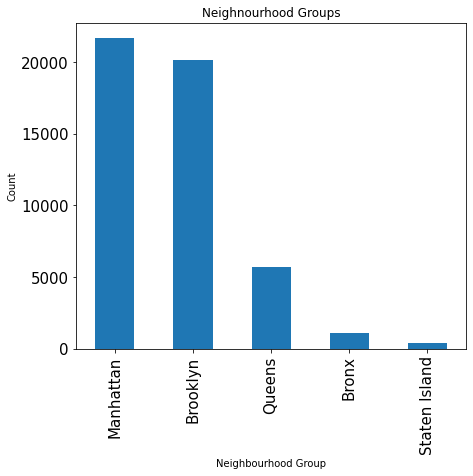

In [11]:
Nbr_grp = df["neighbourhood_group"].value_counts().plot(kind="bar", figsize=(7,6), fontsize=15)
Nbr_grp.set_xlabel("Neighbourhood Group")
Nbr_grp.set_ylabel("Count")
Nbr_grp.set_title("Neighnourhood Groups")

Text(0.5, 1.0, 'room_type')

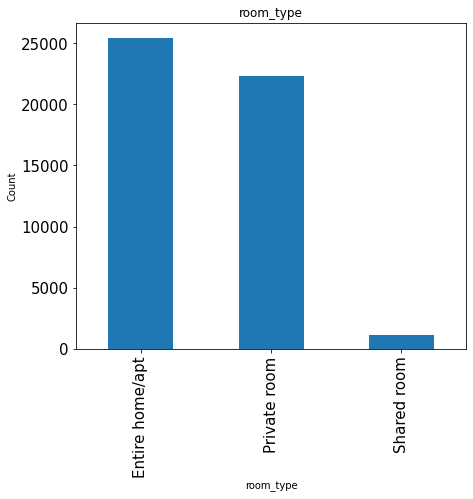

In [12]:
room = df["room_type"].value_counts().plot(kind="bar", figsize=(7,6), fontsize=15)
room.set_xlabel("room_type")
room.set_ylabel("Count")
room.set_title("room_type")

In [13]:
df['price_range']=pd.qcut(df['price'],q=10)

In [14]:
df['price_range'].value_counts()

(155.0, 200.0]      6257
(106.0, 130.0]      5230
(60.0, 75.0]        5184
(49.0, 60.0]        5036
(-0.001, 49.0]      5027
(269.0, 10000.0]    4878
(75.0, 90.0]        4651
(90.0, 106.0]       4574
(130.0, 155.0]      4552
(200.0, 269.0]      3506
Name: price_range, dtype: int64

<AxesSubplot:>

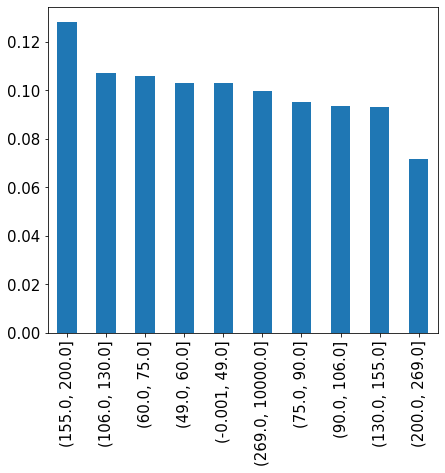

In [15]:
df['price_range'].value_counts(normalize=True).plot(kind="bar", figsize=(7,6), fontsize=15)

In [16]:
df['neighbourhood_group'].value_counts(normalize=True)

Manhattan        0.443011
Brooklyn         0.411167
Queens           0.115881
Bronx            0.022313
Staten Island    0.007629
Name: neighbourhood_group, dtype: float64

<Figure size 1440x1440 with 0 Axes>

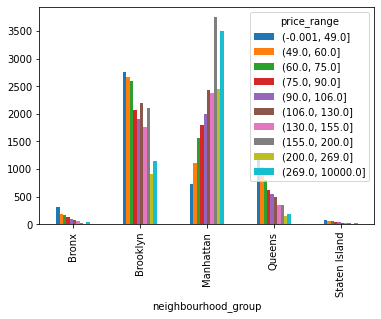

In [17]:
fig=plt.figure(figsize=(20,20))
df.groupby(['neighbourhood_group','price_range'])['price_range'].count().unstack().plot(kind='bar')
plt.rcParams['figure.figsize'] = (10,10)

<AxesSubplot:xlabel='neighbourhood_group'>

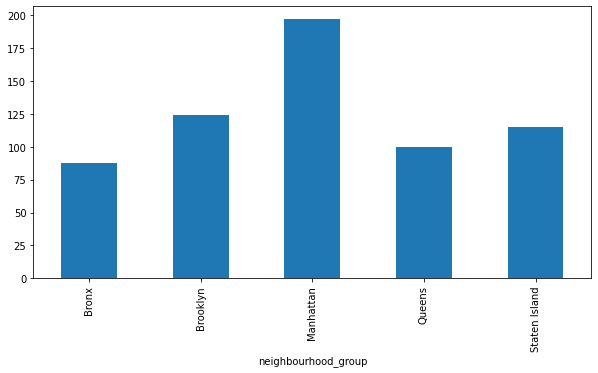

In [18]:
fig=plt.figure(figsize=(10,5))
df.groupby('neighbourhood_group')['price'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='room_type'>

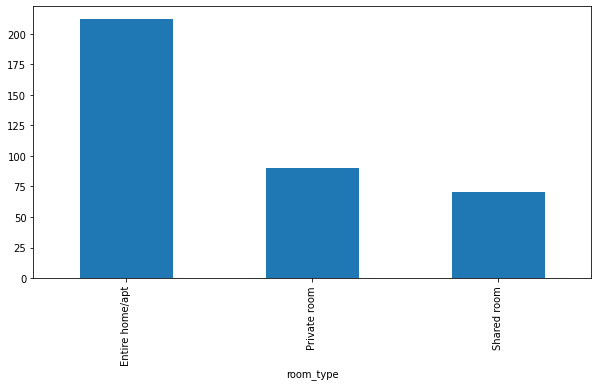

In [19]:
fig=plt.figure(figsize=(10,5))
df.groupby('room_type')['price'].mean().plot(kind = 'bar')

In [20]:
df['room_type'].value_counts(normalize=True)

Entire home/apt    0.519665
Private room       0.456611
Shared room        0.023724
Name: room_type, dtype: float64

<AxesSubplot:xlabel='year'>

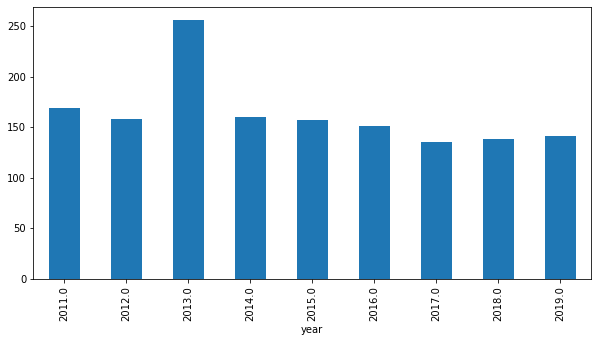

In [21]:
fig=plt.figure(figsize=(10,5))
df.groupby('year')['price'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='year'>

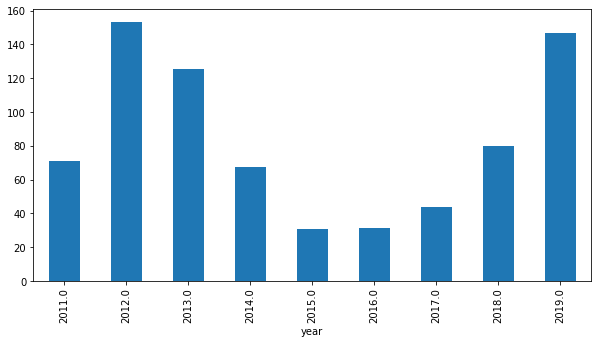

In [22]:
fig=plt.figure(figsize=(10,5))
df.groupby('year')['availability_365'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='month'>

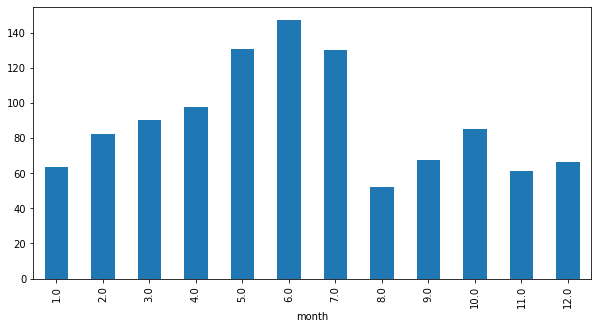

In [23]:
fig=plt.figure(figsize=(10,5))
df.groupby('month')['availability_365'].mean().plot(kind = 'bar')

In [24]:
df.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,month,day,year
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468,-0.051368,0.028409,0.407407
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492,-0.030284,0.029377,0.265958
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983,-0.002245,0.000321,-0.020564
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731,0.000772,0.016712,0.101660
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829,0.003668,0.007770,-0.016636
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303,-0.013352,-0.000285,-0.048419
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028,-0.005364,0.017201,0.272176
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791,0.003139,0.040335,0.423998
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701,-0.026610,0.003324,0.053089
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000,-0.034613,0.039330,0.312937


(13.5, -0.5)

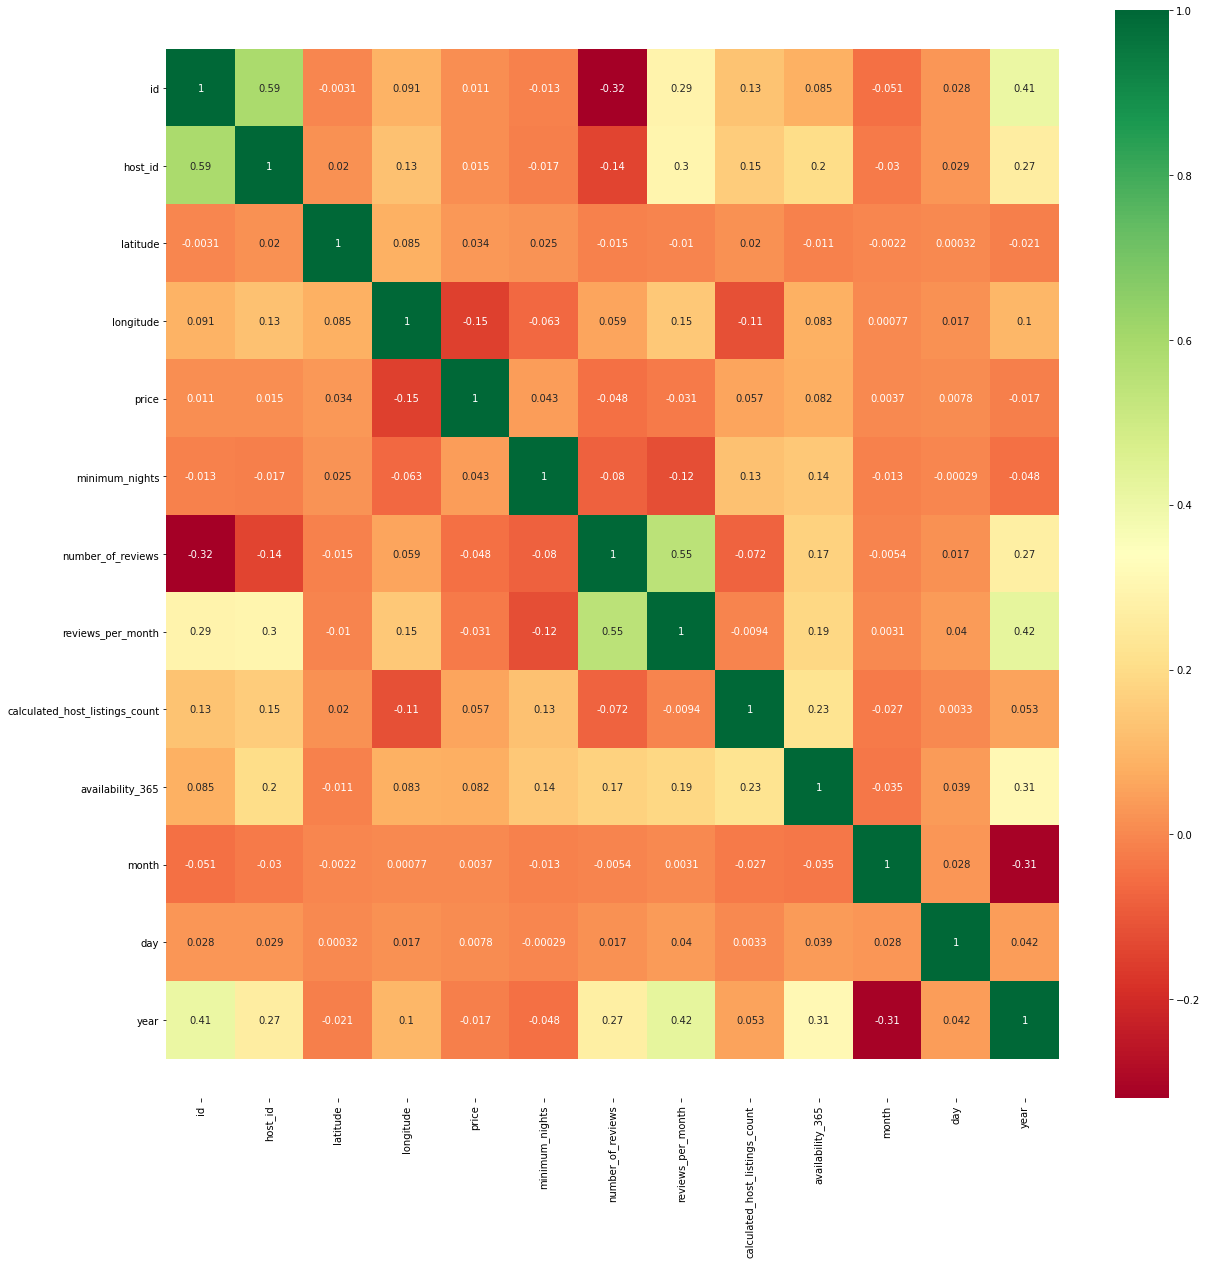

In [25]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)

In [26]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

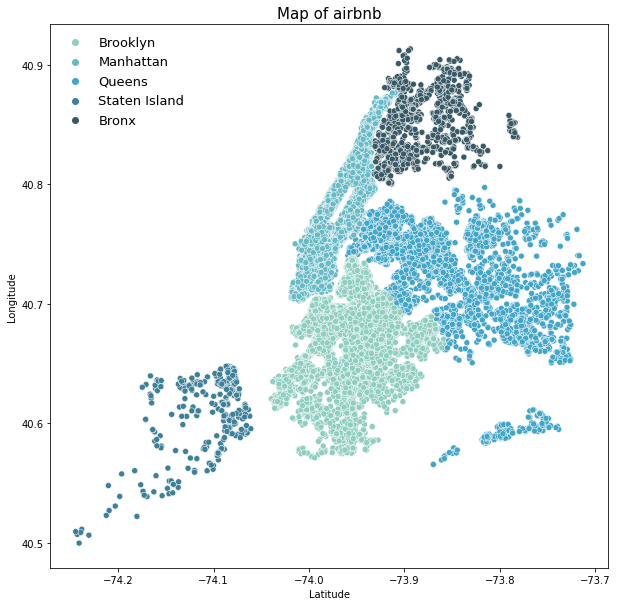

In [27]:
plt.figure(figsize=(10,10))
a = sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', palette='GnBu_d')
plt.title('Map of airbnb', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.legend(frameon=False, fontsize=13)

In [28]:
df["year"].fillna(2019, inplace = True)
df["month"].fillna(6, inplace = True)
df["day"].fillna(17, inplace = True) 

In [29]:
df.drop(columns = ['id', 'neighbourhood','name','host_id','host_name','latitude', 'longitude','last_review','reviews_per_month','month','day','year','price_range'],axis=1, inplace=True)

In [30]:
rfr=RandomForestRegressor()

In [31]:
df.head()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,9,6,365
1,Manhattan,Entire home/apt,225,1,45,2,355
2,Manhattan,Private room,150,3,0,1,365
3,Brooklyn,Entire home/apt,89,1,270,1,194
4,Manhattan,Entire home/apt,80,10,9,1,0


In [32]:
X=df.drop('price',axis=1)
y=df['price']

In [33]:
X=pd.get_dummies(df,drop_first=True)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [35]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [36]:
predictions = rfr.predict(X_test)

c:\users\shariq\anaconda3\envs\airbnb\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

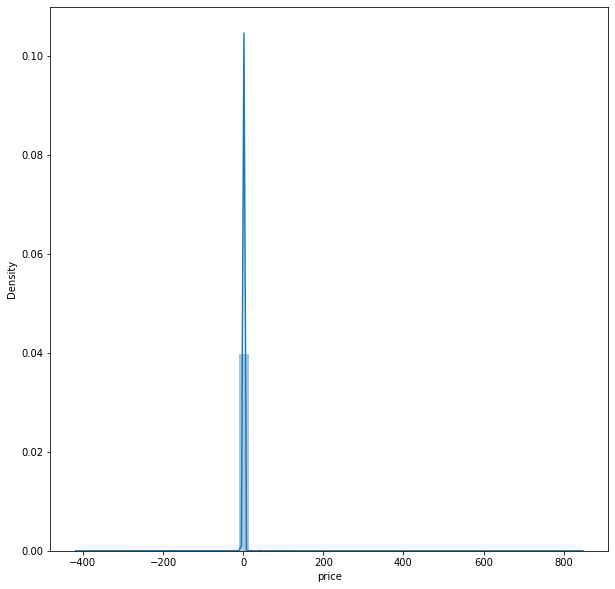

In [37]:
sns.distplot(y_test-predictions)

In [38]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.18975526620764863
MSE: 78.90877720362678
RMSE: 8.883061251822301


In [39]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rfr, file)